<a href="https://colab.research.google.com/github/mainaak03/Heart_Disease_Prediction/blob/main/heartfailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/datasets/heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


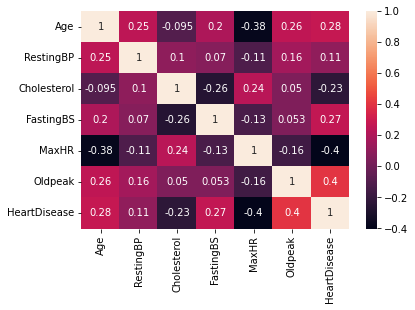

In [ ]:
sns.heatmap(data.corr(), annot=True)

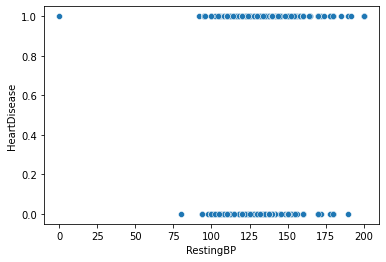

In [ ]:
sns.scatterplot(data=data, x="RestingBP", y="HeartDisease")

In [ ]:
data["RestingBP"]=data["RestingBP"].replace(0,data["RestingBP"].median())

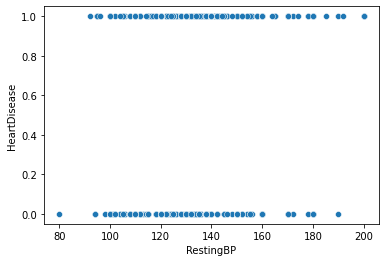

In [ ]:
sns.scatterplot(data=data, x="RestingBP", y="HeartDisease")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
num_cols = list(set(data.columns)-set(cat_cols))

In [ ]:
cat_transformer = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(handle_unknown="error"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('pass', 'passthrough', make_column_selector(dtype_include=["float64", "int64"])),
        ("categorical", cat_transformer, make_column_selector(dtype_include="object")),
    ]
)

In [ ]:
data_final = pd.DataFrame(preprocessor.fit_transform(data), columns=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]+cat_cols)
# preprocessor.get_feature_names_out()
data_final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0.0,0.0,1.0,1.0,1.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
y = data_final["HeartDisease"]
x = data_final.drop(columns=["HeartDisease"])

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.85, random_state=0)

In [ ]:
f_model = RandomForestClassifier(n_estimators=100, random_state=0, verbose=1)
f_model.fit(x_train, y_train)
f_model.feature_importances_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


array([0.07397433, 0.06680225, 0.08760131, 0.02075687, 0.11970679,
       0.09861946, 0.03349264, 0.10434203, 0.02558265, 0.0917351 ,
       0.27738658])

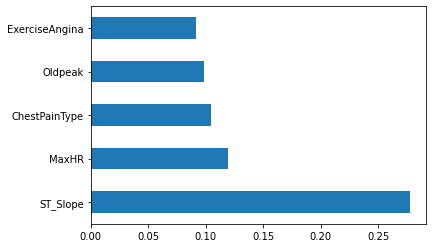

In [ ]:
feat_importances = pd.Series(f_model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

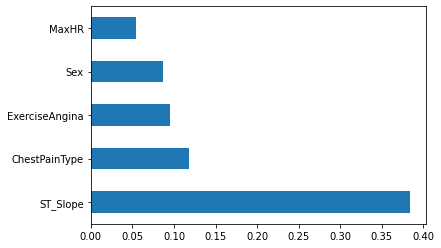

In [ ]:
f_model_1 = XGBClassifier(n_estimators=100, random_state=0, verbose=1)
f_model_1.fit(x_train, y_train)
feat_importances_1 = pd.Series(f_model_1.feature_importances_, index=x_train.columns)
feat_importances_1.nlargest(5).plot(kind='barh')

In [ ]:
mod = XGBClassifier(n_estimators=500, early_stopping_rounds=5, max_depth=11, learning_rate=0.05, random_state=0)
mod.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric="auc", verbose=0)

XGBClassifier(early_stopping_rounds=5, learning_rate=0.05, max_depth=11,
              n_estimators=500)

In [ ]:
pred = mod.predict(x_test)
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       113
         1.0       0.87      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



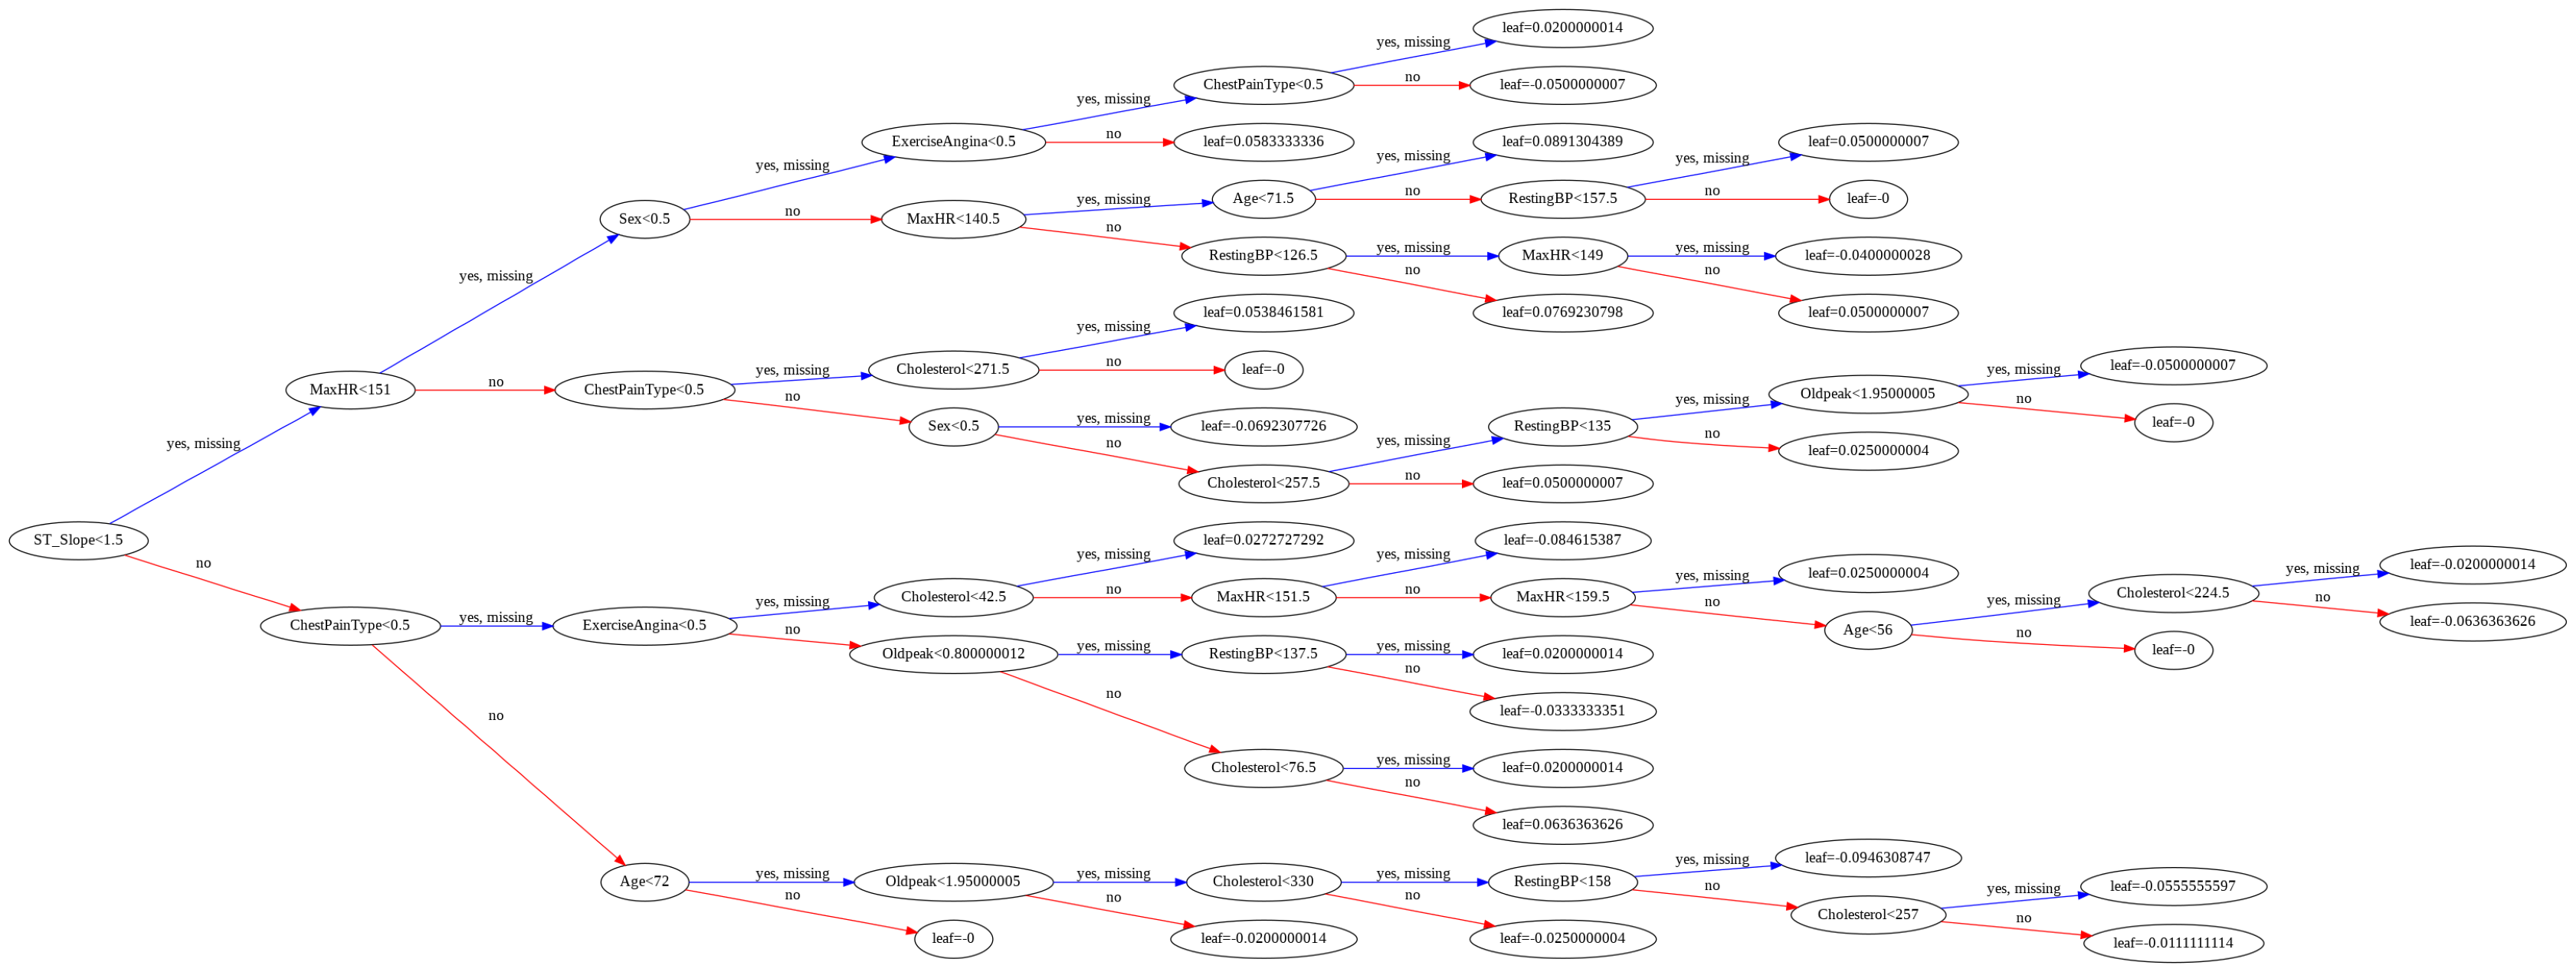

In [ ]:
fig, ax = plt.subplots(figsize=(60, 60))
from xgboost import plot_tree
plot_tree(mod,num_trees=0,rankdir="LR",ax=ax)
plt.show()

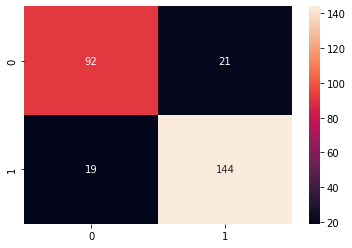

In [ ]:
sns.heatmap(data=sklearn.metrics.confusion_matrix(y_test, pred), annot=True, fmt="d")